In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
import torchvision
import torchvision.transforms as transforms
import time
from PIL import Image
from scipy.ndimage import gaussian_filter

In [2]:
def rgb_to_luma(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    return Y

In [3]:
def sobel_feldman_operator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradient_x = cv2.filter2D(gray, -1, sobel_x)
    gradient_y = cv2.filter2D(gray, -1, sobel_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))
    return gradient_magnitude

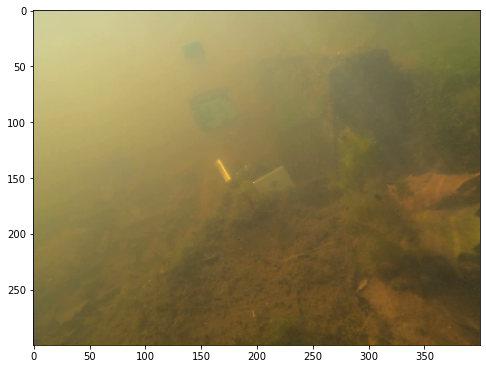

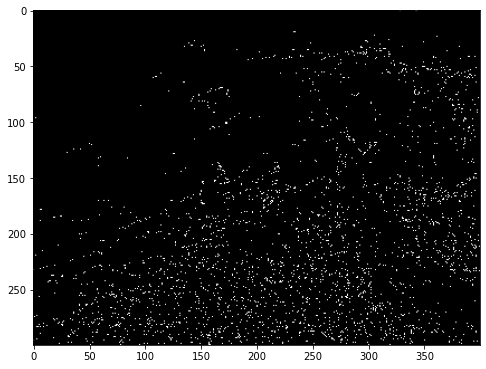

R min: 95 | R max: 208 | Range: 113
G min: 76 | G max: 205 | Range: 129
B min: 35 | B max: 150 | Range: 115


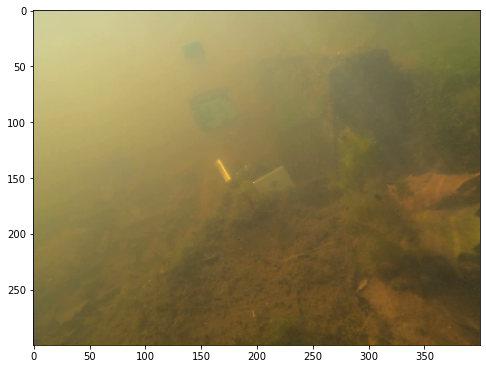

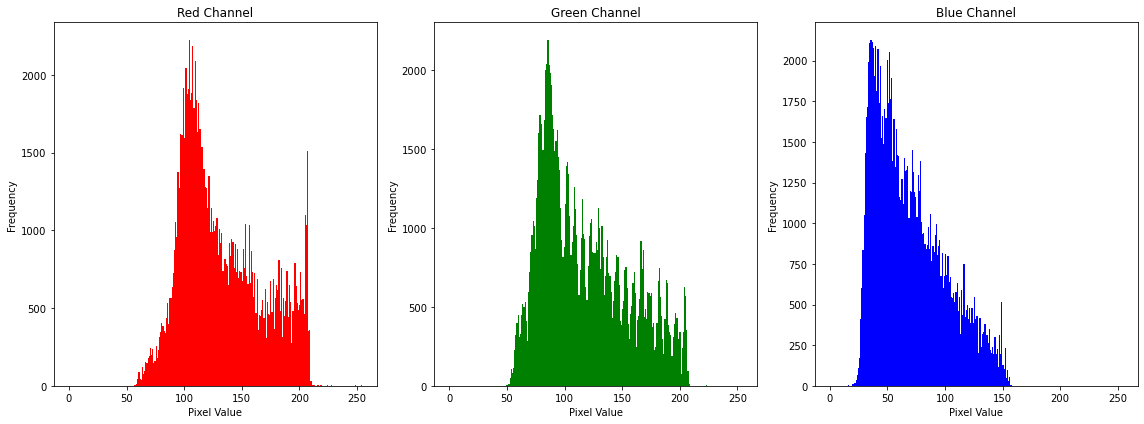

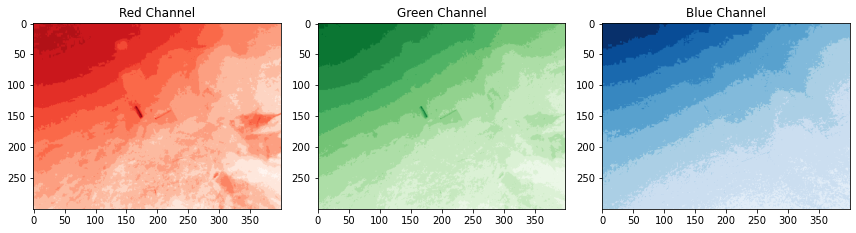

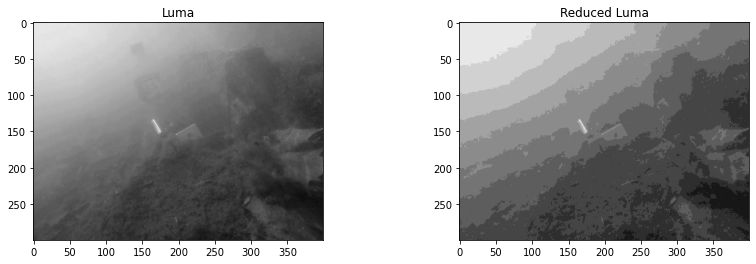

In [4]:
img = np.asarray(Image.open('Desktop/bottleFrames/frame_0001.png'))

scale_w = img.shape[1] // 400
scale_h = img.shape[0] // 300
scaled = np.zeros((300, 400, img.shape[2]), dtype=img.dtype)
for i in range(300):
    for j in range(400):
        x = j * scale_w
        y = i * scale_h
        scaled[i, j] = img[y, x]
        
fig = plt.figure(figsize=(8, 8))
plt.imshow(scaled)
plt.show()

red_channel = scaled[:, :, 0].flatten()
green_channel = scaled[:, :, 1].flatten()
blue_channel = scaled[:, :, 2].flatten()


edges = sobel_feldman_operator(scaled)
for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i][j] > 240:
            edges[i][j] = 255
        else:
            edges[i][j] = 0
fig = plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap="gray")
plt.show()

sbmb = np.zeros((300, 400, img.shape[2]), dtype=img.dtype)
for i in range(0, 300, 16):
    for j in range(0, 400, 16):
        if np.count_nonzero(edges[i:i+16, j:j+16]) > 0:
            sbmb[i:i+16, j:j+16] = 255
        else:
            sbmb[i:i+16, j:j+16] = 0


bottom = 0.1
top = 0.99

sorted_red = list(red_channel)
sorted_red.sort()
red_min = sorted_red[int(len(sorted_red) * bottom)]
red_max = sorted_red[int(len(sorted_red) * top)]
sorted_green = list(green_channel)
sorted_green.sort()
green_min = sorted_green[int(len(sorted_green) * bottom)]
green_max = sorted_green[int(len(sorted_green) * top)]
sorted_blue = list(blue_channel)
sorted_blue.sort()
blue_min = sorted_blue[int(len(sorted_blue) * bottom)]
blue_max = sorted_blue[int(len(sorted_blue) * top)]

print("R min: " + str(red_min) + " | R max: " + str(red_max) + " | Range: " + str(red_max-red_min))
print("G min: " + str(green_min) + " | G max: " + str(green_max) + " | Range: " + str(green_max-green_min))
print("B min: " + str(blue_min) + " | B max: " + str(blue_max) + " | Range: " + str(blue_max-blue_min))
            
fig = plt.figure(figsize=(8, 8))
plt.imshow(scaled)
plt.show()

red_hist, red_bins = np.histogram(red_channel, bins=256, range=(0, 255))
green_hist, green_bins = np.histogram(green_channel, bins=256, range=(0, 255))
blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=(0, 255))

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].bar(red_bins[:-1], red_hist, width=1, color='red')
axes[0].set_title("Red Channel")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

axes[1].bar(green_bins[:-1], green_hist, width=1, color='green')
axes[1].set_title("Green Channel")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

axes[2].bar(blue_bins[:-1], blue_hist, width=1, color='blue')
axes[2].set_title("Blue Channel")
axes[2].set_xlabel("Pixel Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Qred_channel = scaled[:, :, 0] >> 4
Qgreen_channel = scaled[:, :, 1] >> 4
Qblue_channel = scaled[:, :, 2] >> 4

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(Qred_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[1].imshow(Qgreen_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(Qblue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
Y = rgb_to_luma(scaled).astype(np.uint8)
axs[0].imshow(Y, cmap='gray')
axs[0].set_title('Luma')
axs[1].imshow(Y >> 4, cmap='gray')
axs[1].set_title('Reduced Luma')
plt.show()

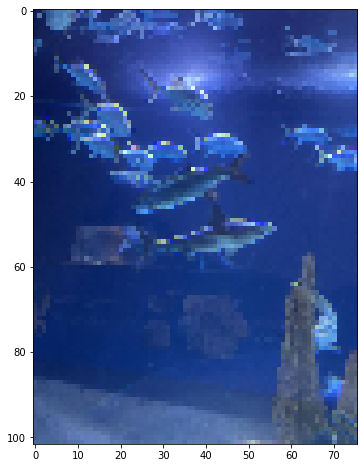

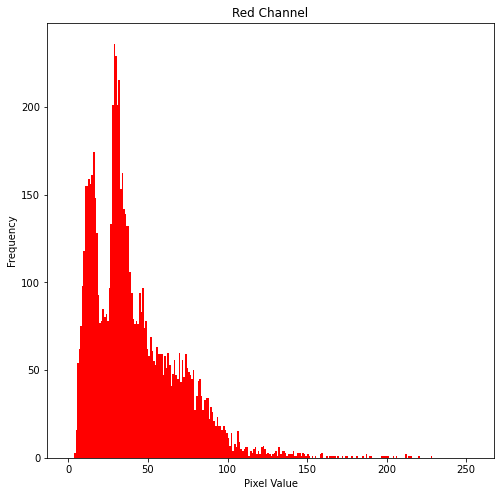

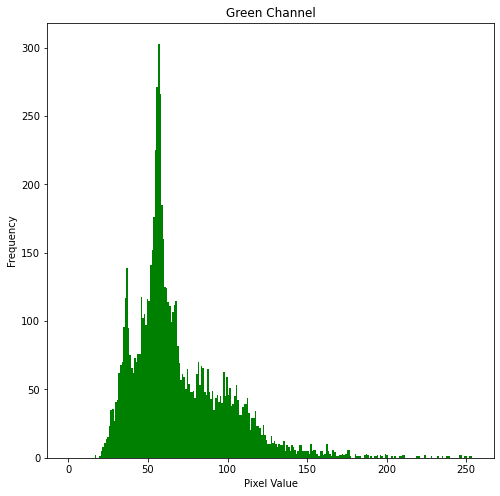

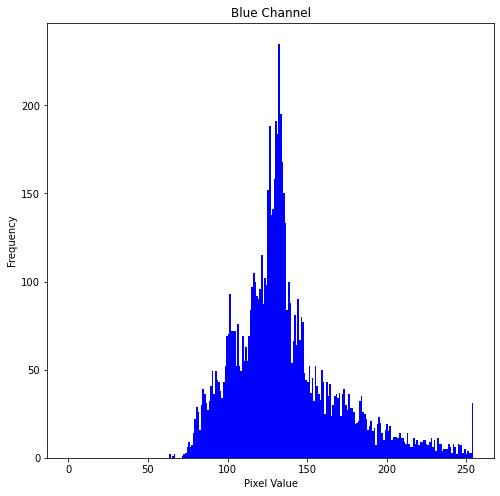

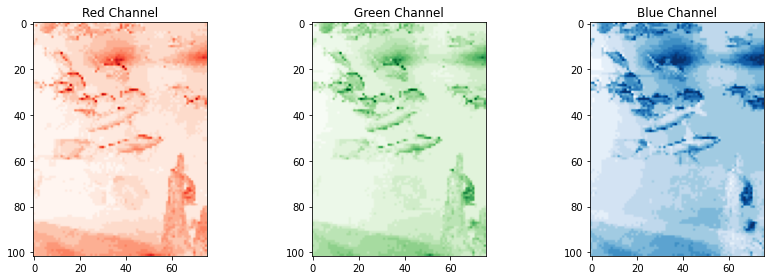

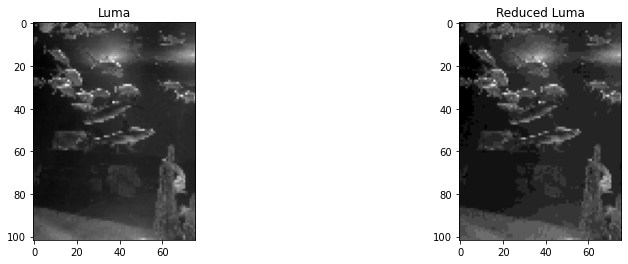

In [5]:
img = np.asarray(Image.open('Desktop/veryBlue.jpg'))

scale_w = img.shape[1] // 76
scale_h = img.shape[0] // 102
scaled = np.zeros((102, 76, img.shape[2]), dtype=img.dtype)
for i in range(102):
    for j in range(76):
        x = j * scale_w
        y = i * scale_h
        scaled[i, j] = img[y, x]
'''
height, width = scaled.shape[:2]
intra4res = np.zeros((height, width, scaled.shape[2]), dtype=scaled.dtype)
for i in range(0, height, 4):
    for j in range(0, width, 4):
        intra4res[i:i+4, j:j+4] = scaled[i, j]
'''
        
fig = plt.figure(figsize=(8, 8))
plt.imshow(scaled)
plt.show()


red_channel = scaled[:, :, 0].flatten()
green_channel = scaled[:, :, 1].flatten()
blue_channel = scaled[:, :, 2].flatten()

red_hist, red_bins = np.histogram(red_channel, bins=256, range=(0, 255))
green_hist, green_bins = np.histogram(green_channel, bins=256, range=(0, 255))
blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=(0, 255))

fig = plt.figure(figsize=(8, 8))
plt.bar(red_bins[:-1], red_hist, width=1, color='red')
plt.title("Red Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

fig = plt.figure(figsize=(8, 8))
plt.bar(green_bins[:-1], green_hist, width=1, color='green')
plt.title("Green Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

fig = plt.figure(figsize=(8, 8))
plt.bar(blue_bins[:-1], blue_hist, width=1, color='blue')
plt.title("Blue Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()




Qred_channel = scaled[:, :, 0] >> 4
Qgreen_channel = scaled[:, :, 1] >> 4
Qblue_channel = scaled[:, :, 2] >> 4

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(Qred_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[1].imshow(Qgreen_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(Qblue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
Y = rgb_to_luma(scaled).astype(np.uint8)
axs[0].imshow(Y, cmap='gray')
axs[0].set_title('Luma')
axs[1].imshow(Y >> 4, cmap='gray')
axs[1].set_title('Reduced Luma')
plt.show()

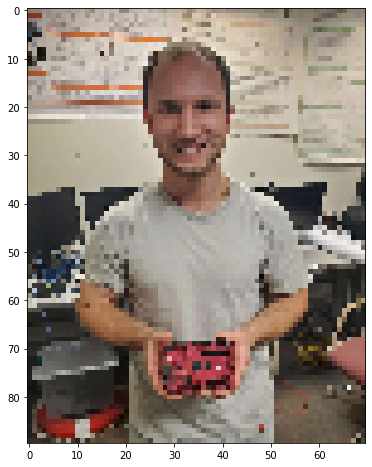

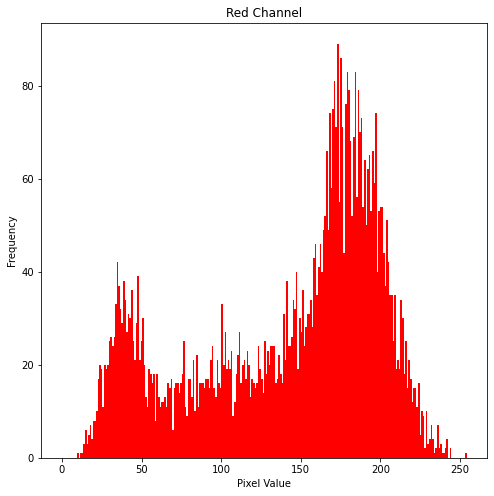

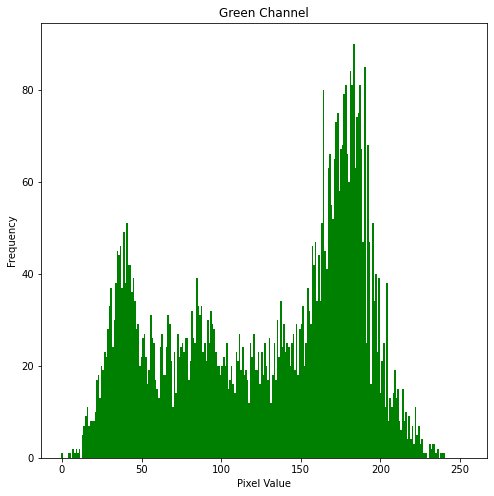

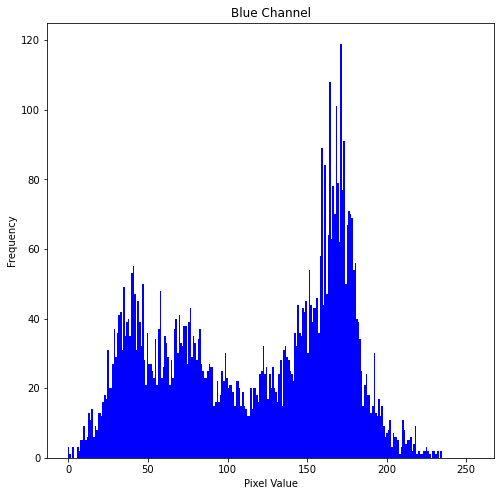

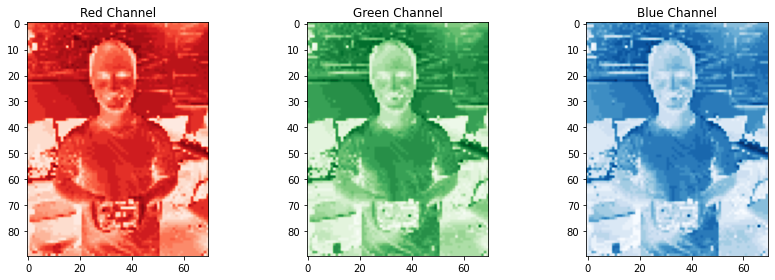

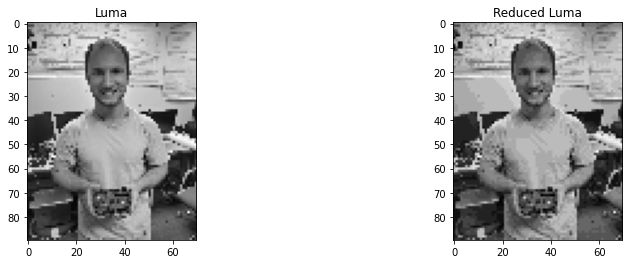

In [6]:
img = np.asarray(Image.open('Desktop/images/pynq.png'))

scale_w = img.shape[1] // 70
scale_h = img.shape[0] // 90
scaled = np.zeros((90, 70, img.shape[2]), dtype=img.dtype)
for i in range(90):
    for j in range(70):
        x = j * scale_w
        y = i * scale_h
        scaled[i, j] = img[y, x]
'''
height, width = scaled.shape[:2]
intra4res = np.zeros((height, width, scaled.shape[2]), dtype=scaled.dtype)
for i in range(0, height, 4):
    for j in range(0, width, 4):
        intra4res[i:i+4, j:j+4] = scaled[i, j]
'''
        
fig = plt.figure(figsize=(8, 8))
plt.imshow(scaled)
plt.show()


red_channel = scaled[:, :, 0].flatten()
green_channel = scaled[:, :, 1].flatten()
blue_channel = scaled[:, :, 2].flatten()

red_hist, red_bins = np.histogram(red_channel, bins=256, range=(0, 255))
green_hist, green_bins = np.histogram(green_channel, bins=256, range=(0, 255))
blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=(0, 255))

fig = plt.figure(figsize=(8, 8))
plt.bar(red_bins[:-1], red_hist, width=1, color='red')
plt.title("Red Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

fig = plt.figure(figsize=(8, 8))
plt.bar(green_bins[:-1], green_hist, width=1, color='green')
plt.title("Green Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

fig = plt.figure(figsize=(8, 8))
plt.bar(blue_bins[:-1], blue_hist, width=1, color='blue')
plt.title("Blue Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()




Qred_channel = scaled[:, :, 0] >> 4
Qgreen_channel = scaled[:, :, 1] >> 4
Qblue_channel = scaled[:, :, 2] >> 4

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(Qred_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[1].imshow(Qgreen_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(Qblue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
Y = rgb_to_luma(scaled).astype(np.uint8)
axs[0].imshow(Y, cmap='gray')
axs[0].set_title('Luma')
axs[1].imshow(Y >> 4, cmap='gray')
axs[1].set_title('Reduced Luma')
plt.show()

In [7]:
def upsample(image, factor):
    height, width, channels = image.shape
    new_height = height * factor
    new_width = width * factor
    upsampled = np.zeros((new_height, new_width, channels), dtype=image.dtype)
    upsampled[::factor, ::factor, :] = image
    return upsampled

In [8]:
def linear_upsample(image, factor):
    height, width, channels = image.shape
    new_height = height * factor
    new_width = width * factor
    upsampled = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    return upsampled

In [9]:
def sinc_interpolation(image, factor):
    height, width, channels = image.shape
    new_height = height * factor
    new_width = width * factor
    interpolated = np.zeros((new_height, new_width, channels), dtype=image.dtype)

    for c in range(channels):
        for i in range(new_height):
            for j in range(new_width):
                x = (j + 0.5) / factor
                y = (i + 0.5) / factor
                interpolated[i, j, c] = compute_sinc_interpolation(image[:, :, c], x, y)
    return interpolated

def compute_sinc_interpolation(channel, x, y):
    height, width = channel.shape
    i = int(y)
    j = int(x)
    fractional_x = x - j
    fractional_y = y - i
    value = 0.0

    for m in range(-2, 3):
        for n in range(-2, 3):
            if 0 <= i + m < height and 0 <= j + n < width:
                value += channel[i + m, j + n] * sinc_kernel(fractional_x - n) * sinc_kernel(fractional_y - m)
    return value

def sinc_kernel(x):
    if x == 0.0:
        return 1.0
    else:
        return np.sin(np.pi * x) / (np.pi * x)

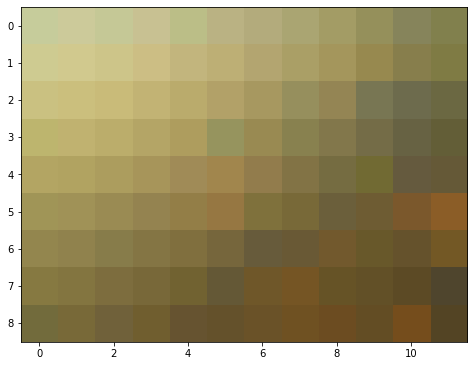

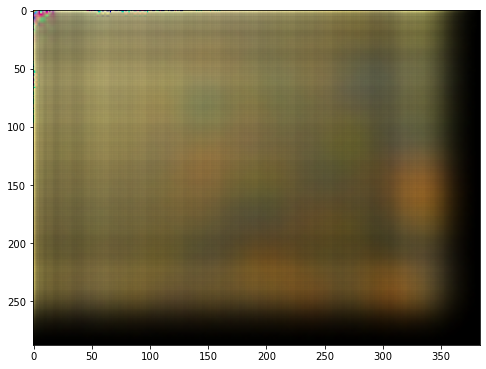

In [15]:
img = np.asarray(Image.open('Desktop/bottleFrames/frame_0001.png'))
scale_w = img.shape[1] // 400
scale_h = img.shape[0] // 300
scaled = np.zeros((300, 400, img.shape[2]), dtype=img.dtype)
for i in range(300):
    for j in range(400):
        x = j * scale_w
        y = i * scale_h
        scaled[i, j] = img[y, x]
c = scaled.copy()
for i in range(5):
    a = c.copy()
    ycrcb_image = cv2.cvtColor(a, cv2.COLOR_BGR2YCrCb)
    Y = ycrcb_image[:, :, 0]
    filtered_Y = cv2.GaussianBlur(Y, (5, 5), 0)
    filtered_ycrcb_image = ycrcb_image.copy()
    filtered_ycrcb_image[:, :, 0] = filtered_Y
    b = cv2.cvtColor(filtered_ycrcb_image, cv2.COLOR_YCrCb2BGR)
    
    c = np.zeros((b.shape[0] // 2, b.shape[1] // 2, b.shape[2]), dtype=img.dtype)
    for i in range(b.shape[0] // 2):
        for j in range(b.shape[1] // 2):
            x = j * 2
            y = i * 2
            c[i, j] = b[y, x]
            
fig = plt.figure(figsize=(8, 8))
plt.imshow(c)
plt.show()

for i in range(5):
    a = sinc_interpolation(c, 2)
    c = a.copy()

fig = plt.figure(figsize=(8, 8))
plt.imshow(c)
plt.show()

In [16]:
lat = []
for i in range(1,191):
    fn = ""
    num = str(i)
    if i < 10: fn = "000" + num
    elif i < 100: fn = "00" + num
    else: fn = "0" + num
    img = np.asarray(Image.open('Desktop/bottleFrames/frame_' + fn + '.png'))
    scale_w = img.shape[1] // 400
    scale_h = img.shape[0] // 300
    scaled = np.zeros((300, 400, img.shape[2]), dtype=img.dtype)
    for i in range(300):
        for j in range(400):
            x = j * scale_w
            y = i * scale_h
            scaled[i, j] = img[y, x]
    c = scaled.copy()

    downsampled_images = []
    for i in range(5):
        a = c.copy()
        ycrcb_image = cv2.cvtColor(a, cv2.COLOR_BGR2YCrCb)
        Y = ycrcb_image[:, :, 0]
        filtered_Y = cv2.GaussianBlur(Y, (5, 5), 0)
        filtered_ycrcb_image = ycrcb_image.copy()
        filtered_ycrcb_image[:, :, 0] = filtered_Y
        b = cv2.cvtColor(filtered_ycrcb_image, cv2.COLOR_YCrCb2BGR)

        c = np.zeros((b.shape[0] // 2, b.shape[1] // 2, b.shape[2]), dtype=img.dtype)
        for i in range(b.shape[0] // 2):
            for j in range(b.shape[1] // 2):
                x = j * 2
                y = i * 2
                c[i, j] = b[y, x]
        downsampled_images.append(c)

    reconstructed_image = downsampled_images[-1]
    lat.append(reconstructed_image)
    
    
    '''
    for i in range(4, -1, -1):
        reconstructed_image = linear_upsample(reconstructed_image, 2)
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(reconstructed_image)
    plt.show()
    ''';

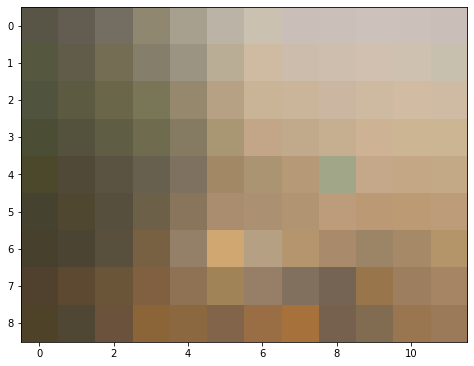

In [17]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_image)
plt.show()

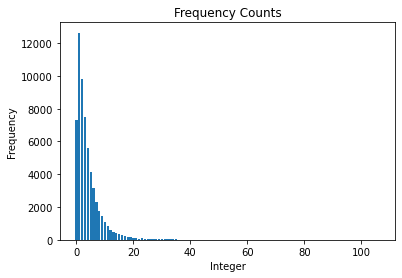

In [13]:
matrices = []
for i in range(1, 190):
    m0 = lat[i-1].astype(int)
    m1 = lat[i].astype(int)
    matrices.append(abs(m1 - m0))
    
concatenated = np.concatenate(matrices)
flattened = concatenated.flatten()
counts = np.bincount(flattened)

plt.bar(range(len(counts)), counts)
plt.xlabel('Integer')
plt.ylabel('Frequency')
plt.title('Frequency Counts')
plt.show()

In [14]:
print(f"The percentage of integers below 8 is: {(np.sum(counts[:16]) / np.sum(counts)) * 100}%")

The percentage of integers below 8 is: 97.03115814226926%


In [ ]:
motion_matrix = np.zeros((frame_N.shape[0] // 16 - 1, frame_N.shape[1] // 16 - 1), dtype=[('x', int), ('y', int)])
i_idx = -1
for i in range(16, frame_N.shape[0] - 16, 16):
    i_idx += 1
    j_idx = -1
    for j in range(16, frame_N.shape[1] - 16, 16):
        j_idx += 1
        curr_mb = frame_N[i:i+16, j:j+16]
        search_area = frame_N_1[i-12:i+28, j-12:j+28]
        m_x, m_y = inter16x((12,12))[1:3]
        motion_matrix[i_idx][j_idx] = (12 - m_x, 12 - m_y)
        
motion_matrix